# Task 8 (Extended). Practical analysis of advanced algorithms
Alexandra Matveeva J4134c

In [143]:
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import math
import time
import scipy
import sys
from scipy.optimize import curve_fit
from networkx.algorithms import tree

## Prim's algorithm

In [146]:
def adjacency_matrix(vertices, edges):
  edge_min = vertices - 1
  matrix = np.zeros((vertices, vertices))
  edge = 0

  temp = 0 
  while temp < vertices:
    j = np.random.randint(0, vertices)
    # print(f'({temp}, {j})')
    if temp != j:
      matrix[temp][j] = np.random.randint(1, 100)
      matrix[j][temp] = matrix[temp][j]
      
      edge += 1
      temp += 1
    
  while edge < edges:
    i = np.random.randint(0, vertices)
    j = np.random.randint(0, vertices)
    if i != j and matrix[i][j] == 0:
      matrix[i][j] = np.random.randint(1, 100)
      matrix[j][i] = matrix[i][j]
      edge += 1
  return matrix

In [147]:
def prim_alg(matrix, span_tree, V):
  selected = [0 for column in range(V)]
  # set number of edge to 0
  no_edge = 0

  selected[0] = True

  while (no_edge < V - 1):

    minimum = float('inf')
    x = 0
    y = 0
    for i in range(V):
      if selected[i]:
        for j in range(V):
          if ((not selected[j]) and matrix[i][j]):  
          # not in selected and there is an edge
            if minimum > matrix[i][j]:
              minimum = matrix[i][j]
              x = i
              y = j
    span_tree[x][y] = matrix[x][y]
    span_tree[y][x] = span_tree[x][y]
    
    selected[y] = True
    no_edge += 1
  return matrix, span_tree

In [ ]:
# n^3 function estimation
def cube_function_est(x, a):
    return a * np.power(x, 3)

In [169]:
# nlogn function estimation
def nlogn_function_est(x, a):
  return a * x * np.log(x)

In [148]:
V_init = 3
V_max = 200
avg_times_cube = []

for vert in range(V_init, V_max):
  t = []
  min_e = vert - 1
  max_e = (vert - 1) * vert / 2
  ed = random.randint(min_e, max_e)

  for i in range(5):
    G = adjacency_matrix(vert, ed)
    GG = np.zeros((vert, vert))

    start_t = time.perf_counter()
    G, GG = prim_alg(G, GG, vert)
    end_t = time.perf_counter()

    t.append(end_t - start_t)

  avg_times_cube.append(np.mean(t))

In [ ]:
# python implementation

# V_init = 3
# V_max = 200
# avg_times_impl = []

# for vert in range(V_init, V_max):
#   t = []
#   min_e = vert - 1
#   max_e = (vert - 1) * vert / 2
#   ed = random.randint(min_e, max_e)

#   for i in range(5):
#     G = adjacency_matrix(vert, ed)
    
#     g = nx.Graph(G)

#     start_t = time.perf_counter()

#     tree.minimum_spanning_edges(g, algorithm="prim", data=False) 

#     end_t = time.perf_counter()

#     t.append(end_t - start_t)

#   avg_times_impl.append(np.mean(t))





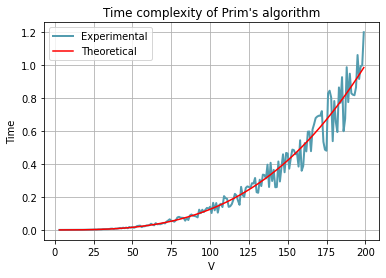

In [150]:
x_data = [n for n in range(V_init, V_max)]

_, ax = plt.subplots()
    
ax.plot(x_data, avg_times_cube, lw = 2, color = '#539caf', alpha = 1)

popt_cube, cov_cube = curve_fit(cube_function_est, x_data, avg_times_cube)
plt.plot(x_data, cube_function_est(x_data, *popt_cube), 'r-')

plt.legend(["Experimental", "Theoretical"])

ax.grid()
ax.set_title("Time complexity of Prim's algorithm")
ax.set_xlabel('V')
ax.set_ylabel('Time')
plt.show()

In [149]:
G

array([[ 0., 38., 14., ..., 36., 89., 16.],
       [38.,  0., 15., ..., 39., 90., 23.],
       [14., 15.,  0., ..., 39.,  7., 16.],
       ...,
       [36., 39., 39., ...,  0., 61., 80.],
       [89., 90.,  7., ..., 61.,  0.,  0.],
       [16., 23., 16., ..., 80.,  0.,  0.]])


Algorithm visualization

Adjecency matrix:
 [[ 0. 19.  0.  0.  0.  0.  0.  0. 14.  0.  0.  0.]
 [19.  0.  0.  0.  0.  0. 43. 27. 79. 72.  0. 64.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 14.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 28.  0.  0.  0.  0. 21. 64.]
 [ 0.  0.  0.  0. 28.  0.  0.  0.  0. 62.  0.  0.]
 [ 0. 43.  0.  0.  0.  0.  0.  0.  0.  0. 12.  0.]
 [ 0. 27.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [14. 79.  0. 14.  0.  0.  0.  0.  0. 45.  0.  0.]
 [ 0. 72.  0.  0.  0. 62.  0.  0. 45.  0.  0.  0.]
 [ 0.  0.  0.  0. 21.  0. 12.  0.  0.  0.  0. 18.]
 [ 0. 64.  3.  0. 64.  0.  0.  0.  0.  0. 18.  0.]] 

Min Spanning Tree matrix:
 [[ 0. 19.  0.  0.  0.  0.]
 [19.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 28.]
 [ 0.  0.  0.  0. 28.  0.]] 



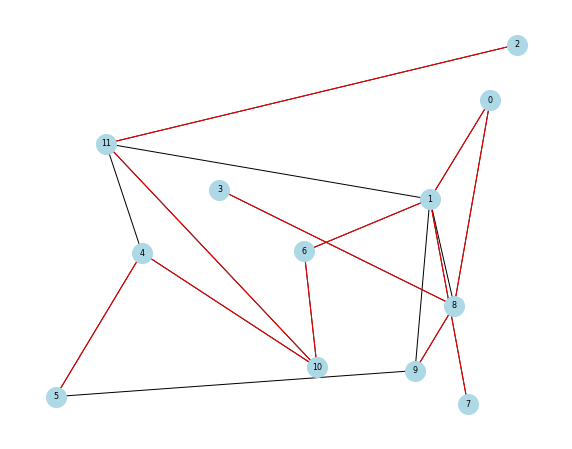

In [160]:
print('\nAlgorithm visualization\n')

G_vis = adjacency_matrix(12, 17)
GG_vis = np.zeros((12, 12))

print('Adjecency matrix:\n', G_vis[:12, :12], '\n')

G_vis, GG_vis = prim_alg(G_vis, GG_vis, 12)

print('Min Spanning Tree matrix:\n', GG_vis[:6, :6], '\n')

G = nx.Graph(G_vis)
GG = nx.Graph(GG_vis)
pos = nx.random_layout(G)
plt.figure(3, figsize=(10, 8))
labels = {}
for k in range(12):
  labels[k] = "{0}".format(k)
nx.draw_networkx_labels(G, pos, labels, font_size=8, font_color="black")
nx.draw(G, pos, node_size = 400, node_color = "lightblue", edge_color = "black")
nx.draw_networkx_edges(GG,pos=pos, edge_color='r')

# Heap sort

In [163]:
def heapify(arr, n, i):
  largest = i  # Initialize largest as root
  l = 2 * i + 1     # left = 2*i + 1
  r = 2 * i + 2     # right = 2*i + 2
 
  # See if left child of root exists and is
  # greater than root
  if l < n and arr[largest] < arr[l]:
    largest = l
 
  # See if right child of root exists and is
  # greater than root
  if r < n and arr[largest] < arr[r]:
    largest = r
 
  # Change root, if needed
  if largest != i:
    arr[i], arr[largest] = arr[largest], arr[i]  # swap
 
    # Heapify the root.
    heapify(arr, n, largest)

In [164]:
def heapSort(arr):
  n = len(arr)
 
  # Build a maxheap.
  for i in range(n//2 - 1, -1, -1):
    heapify(arr, n, i)
 
  # One by one extract elements
  for i in range(n-1, 0, -1):
    arr[i], arr[0] = arr[0], arr[i]  # swap
    heapify(arr, i, 0)

In [165]:
# сразу массив заполнить от 0 до n
# best
arr = [12, 11, 13, 5, 6, 7]
heapSort(arr)
n = len(arr)
print("Sorted array is")
for i in range(n):
    print("%d" % arr[i]),
# This code is contributed by Mohit Kumra

Sorted array is
5
6
7
11
12
13


In [168]:
# average

avg_times_average = []

for n in range(1, 500):
  t = []

  for j in range(5):
    #vector initialization
    vector = np.random.uniform(low=0, high=100, size=n)

    start_t = time.perf_counter()
    heapSort(vector)
    end_t = time.perf_counter()

    t.append(end_t - start_t)

  avg_times_average.append(np.mean(t))

In [ ]:
# worst

# сразц заполнить массив от n до 0

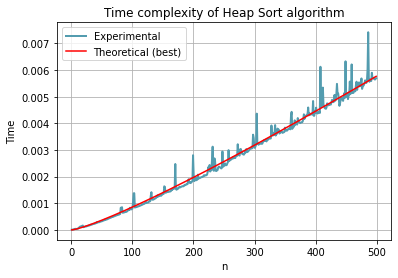

In [175]:
# x_data = [n for n in range(1, 500)]

_, ax = plt.subplots()
    
ax.plot(x_data, avg_times_average[1:], lw = 2, color = '#539caf', alpha = 1)

# popt, cov_cube = curve_fit(nlogn_function_est, x_data, avg_times_average)


x_data = np.linspace(1, len(avg_times_average), len(avg_times_average)-1, dtype=np.float64)
    
popt, cov = curve_fit(nlogn_function_est, x_data, avg_times_average[1:])
plt.plot(x_data, nlogn_function_est(x_data, *popt_best), 'r-')

plt.legend(["Experimental", "Theoretical (best)"])

ax.grid()
ax.set_title("Time complexity of Heap Sort algorithm")
ax.set_xlabel('n')
ax.set_ylabel('Time')
plt.show()